In [6]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

In [7]:
import matplotlib.pyplot as plt

In [40]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to C:\Users\Hamza
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hamza
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hamza
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Hamza
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1: Getting the dataset.

In [8]:
#used to read CSV files
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.isna().sum()




v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# 2: Removing unnecessary columns

In [9]:
df[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']]

,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
5567,NaN,NaN,NaN
5568,NaN,NaN,NaN
5569,NaN,NaN,NaN
5570,NaN,NaN,NaN


In [10]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
#saving file without unwanted columns.
df.to_csv(r'spam2.csv', index=False)
#df2=pd.read_csv('spam2.csv')
#df2


# 3: Txt normalization 

In [11]:
#function for cleaning the text with the help of chtgpt and copilot.
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    stop_words.discard('won')  
 
    tokens = [word for word in tokens if word not in stop_words]

    #print(f"Tokens after stopwords removal: {tokens}")
    

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    cleaned_text = ' '.join(tokens)
    
    #print(f"Original: {text}")
    #print(f"Lemmatized: {cleaned_text}")
    
    return cleaned_text

In [12]:
df['cleaned_text'] = df['v2'].apply(clean_text)
print(df[['v2', 'cleaned_text']].head())
#text="i have won the game and i got free call to dubai."
#cleaned_text2=clean_text(text)
#cleaned_text2

                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


In [13]:
#with these steps text is normalized i.e removed punctuation,empty space, digits ,stopwords like 'the,is ,in ,and' etc. 
df

,v1,v2,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u won å pound prize cl...
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [18]:
df.duplicated().sum()

403

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
#spam messages
spam = []
df_spam = df[df['v1']=='spam']['cleaned_text'].tolist()
for msg in df_spam:
    for word in msg.split():
        spam.append(word)


In [23]:
len(spam)

9506

In [24]:
from collections import Counter
dff = pd.DataFrame(Counter(spam).most_common(30))   #most common words use in spam messages/emails
dff.columns = ['word','count']
dff

,word,count
0,call,316
1,å,221
2,free,190
3,u,137
4,txt,126
5,text,121
6,ur,119
7,mobile,115
8,stop,106
9,claim,98


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'å'),
  Text(2, 0, 'free'),
  Text(3, 0, 'u'),
  Text(4, 0, 'txt'),
  Text(5, 0, 'text'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobile'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'reply'),
  Text(11, 0, 'prize'),
  Text(12, 0, 'get'),
  Text(13, 0, 'new'),
  Text(14, 0, 'service'),
  Text(15, 0, 'p'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'won'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'send'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'phone'),
  Text(22, 0, 'cash'),
  Text(23, 0, 'contact'),
  Text(24, 0, 'win'),
  Text(25, 0, 'week'),
  Text(26, 0, 'please'),
  Text(27, 0, 'min'),
  Text(28, 0, 'tc'),
  Text(29, 0, 'customer')])

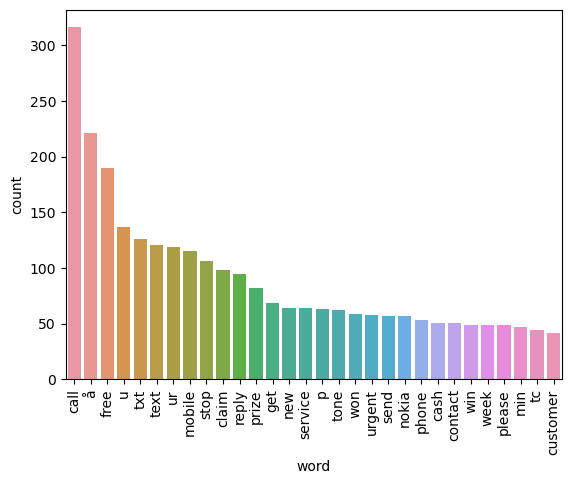

In [25]:
sns.barplot(x=dff['word'],y=dff['count'])
plt.xticks(rotation = 'vertical')

# 4: Text vectorization 

In [26]:
vectorizer=TfidfVectorizer(ngram_range=(1, 2))
X=vectorizer.fit_transform(df['cleaned_text']).toarray()
X.shape

(5169, 38238)

In [27]:
y=df["v1"].map({'ham': 0, 'spam': 1})
y.shape

(5169,)

# 6: splitting data into train and test .

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7: to avoid Repetitiveness.

In [29]:
def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=5):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")
    
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

In [30]:
def predict_new_text(model, vectorizer, new_text):
    cleaned_text = clean_text(new_text)
    X_new = vectorizer.transform([cleaned_text])
    
    if isinstance(X_new, np.ndarray):
        X_new_dense = X_new
    else:
        X_new_dense = X_new.toarray()
    
    prediction = model.predict(X_new_dense)
    return prediction[0]

# training and evaluating the models

In [31]:
lr_model = LogisticRegression()
evaluate_model(lr_model, X_train, X_test, y_train, y_test, cv_folds=5)



Cross-Validation Accuracy Scores: [0.9165659  0.92623942 0.92503023 0.9165659  0.92140266]
Mean Cross-Validation Accuracy: 0.9212
Standard Deviation of Cross-Validation Accuracy: 0.0041
Accuracy: 0.924
Confusion Matrix:
[[887   2]
 [ 77  68]]
Precision: 0.971
Recall: 0.469
F1 Score: 0.633



In [32]:
svm_model = SVC()
evaluate_model(svm_model, X_train, X_test, y_train, y_test, cv_folds=5)


Cross-Validation Accuracy Scores: [0.94800484 0.94316808 0.94679565 0.94558646 0.94558646]
Mean Cross-Validation Accuracy: 0.9458
Standard Deviation of Cross-Validation Accuracy: 0.0016
Accuracy: 0.952
Confusion Matrix:
[[889   0]
 [ 50  95]]
Precision: 1.000
Recall: 0.655
F1 Score: 0.792



In [33]:
bnb_model = BernoulliNB()
evaluate_model(bnb_model, X_train, X_test, y_train, y_test, cv_folds=5)

Cross-Validation Accuracy Scores: [0.88391778 0.89117291 0.89117291 0.89117291 0.8923821 ]
Mean Cross-Validation Accuracy: 0.8900
Standard Deviation of Cross-Validation Accuracy: 0.0031
Accuracy: 0.906
Confusion Matrix:
[[887   2]
 [ 95  50]]
Precision: 0.962
Recall: 0.345
F1 Score: 0.508



In [34]:
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test, cv_folds=5)

Cross-Validation Accuracy Scores: [0.93349456 0.93228537 0.93954051 0.92623942 0.92744861]
Mean Cross-Validation Accuracy: 0.9318
Standard Deviation of Cross-Validation Accuracy: 0.0048
Accuracy: 0.942
Confusion Matrix:
[[889   0]
 [ 60  85]]
Precision: 1.000
Recall: 0.586
F1 Score: 0.739



In [35]:
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, X_test, y_train, y_test, cv_folds=5)

Cross-Validation Accuracy Scores: [0.96251511 0.93470375 0.95888755 0.95767836 0.95042322]
Mean Cross-Validation Accuracy: 0.9528
Standard Deviation of Cross-Validation Accuracy: 0.0099
Accuracy: 0.936
Confusion Matrix:
[[859  30]
 [ 36 109]]
Precision: 0.784
Recall: 0.752
F1 Score: 0.768



In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, cv_folds=5)

Cross-Validation Accuracy Scores: [0.95646917 0.95888755 0.96009674 0.95405079 0.95405079]
Mean Cross-Validation Accuracy: 0.9567
Standard Deviation of Cross-Validation Accuracy: 0.0025
Accuracy: 0.960
Confusion Matrix:
[[889   0]
 [ 41 104]]
Precision: 1.000
Recall: 0.717
F1 Score: 0.835



# New prediction for all models.

In [47]:
new_text="Hey valued customer, congratulations! You've won a free entry to the FA Cup final. Your ticket is valid for the week. Please reply with 'ok' to confirm or 'txt' for more details. Text 'ratetcs' to apply. Don't miss out on this amazing opportunity! Standard charges may apply. Good luck!"

In [48]:
#New prediction here
prediction = predict_new_text(lr_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")

Prediction for new text: 1


In [49]:
#New prediction here
prediction = predict_new_text(svm_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")

Prediction for new text: 1


In [50]:
prediction = predict_new_text(bnb_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")

Prediction for new text: 1


In [51]:
# New prediction using 
prediction = predict_new_text(nb_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")

Prediction for new text: 0


In [52]:
#New prediction using decision tree
prediction = predict_new_text(dt_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")


Prediction for new text: 1


In [53]:
prediction = predict_new_text(rf_model, vectorizer, new_text)
print(f"Prediction for new text: {prediction}")

Prediction for new text: 1


In [224]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(lr_model, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(nb_model, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))
